In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
# Read the image
pic = img.imread('germany.jpg')
# Convert image to double precision for processing
double_img = pic.astype(float)

In [3]:
# Separate color channels
R = double_img[:,:,0]
G = double_img[:,:,1]
B = double_img[:,:,2]

In [4]:
# Perform Singular Value Decomposition (SVD) for each color channel
U_R, S_R, V_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, V_G = np.linalg.svd(G, full_matrices=False)
U_B, S_B, V_B = np.linalg.svd(B, full_matrices=False)


In [5]:
# Set compression threshold - CAN BE CHANGED ACCORDINGLY
threshold = 50

In [6]:
# Truncate singular values based on threshold
S_R_truncated = S_R.copy()
S_R_truncated[threshold+1:] = 0

S_G_truncated = S_G.copy()
S_G_truncated[threshold+1:] = 0

S_B_truncated = S_B.copy()
S_B_truncated[threshold+1:] = 0

In [7]:
# Reconstruct compressed channels
compressed_R = U_R.dot(np.diag(S_R_truncated)).dot(V_R)
compressed_G = U_G.dot(np.diag(S_G_truncated)).dot(V_G)
compressed_B = U_B.dot(np.diag(S_B_truncated)).dot(V_B)

In [8]:
# Combine compressed channels into a compressed image
compressed_img = np.stack([compressed_R, compressed_G, compressed_B], axis=-1)


In [9]:
# Convert compressed image back to uint8 for display
compressed_img = np.uint8(compressed_img)

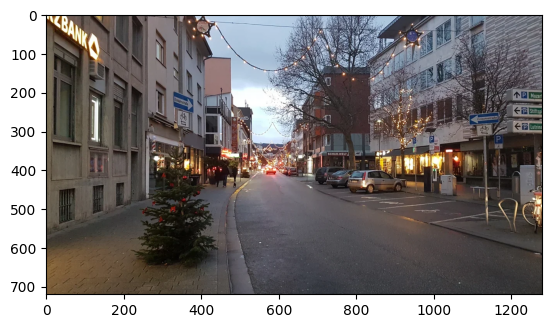

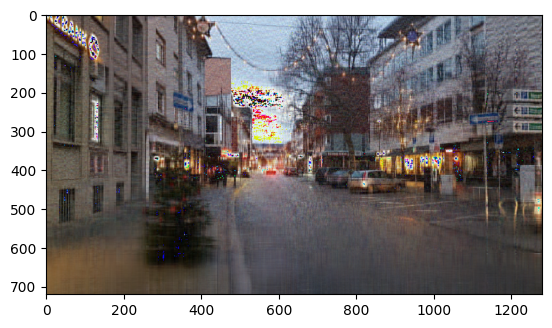

In [10]:
# Display original and compressed images
plt.imshow(pic)
plt.show()

plt.imshow(compressed_img)
plt.show()